In [ ]:
import sys
sys.path.append("C:/Users/Theo/Documents/Unif/ChimpRec/Code")
from chimplib.imports import YOLO, plt, pd

In [ ]:
# Load your trained YOLO model
model_path = ".../v8s/weights/best.pt"  # Update with your model path
yaml_file = ".../ChimpRec/Code/Body_detection/Metric/config.yaml" # Update with your config.yaml path
model = YOLO(model_path)

In [3]:
def get_metric(t):
    # Evaluate the model
    results = model.val(data=yaml_file, split="test", iou=0.6, conf=t, plots=False)

    # Extract mean results
    mean_precision, mean_recall, mean_map50, mean_map = results.box.mean_results()
    return mean_precision, mean_recall

def plot_data(data):
    # Sort data by t values
    sorted_data = sorted(data.items())  
    t_values, pr_recall = zip(*sorted_data)

    # Extract precision and recall
    precision_values, recall_values = zip(*pr_recall)

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(t_values, precision_values, label="Precision", color="mediumvioletred", marker='o', linestyle='-')
    plt.plot(t_values, recall_values, label="Recall", color="rebeccapurple", marker='s', linestyle='-')

    # Labels and title
    plt.xlabel("Confidence threshold")
    plt.ylabel("Value")
    plt.title(f"Precision and Recall as a function of the confidence threshold (iou_t = {0.6}) (body detection)")
    plt.legend()
    plt.grid(True)

    # Set x-axis ticks to show all t values
    plt.xticks(t_values, labels=[str(t) for t in t_values])  # Ensuring each t is explicitly labeled

    # Display the plot
    plt.show()

In [ ]:
iterators = [i/20 for i in range(1, 20, 1)]

data = dict()

for i in iterators:
    precision, recall = get_metric(i)
    data[i] = (precision, recall)
    n_pred = 0

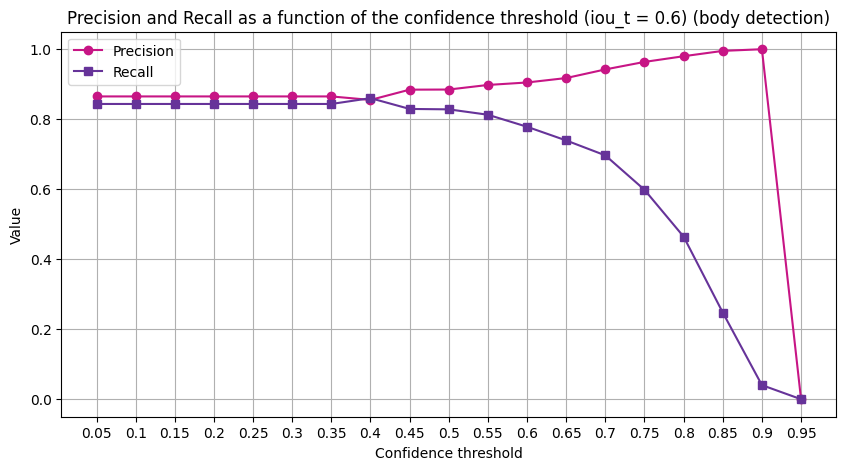

In [9]:

df = pd.DataFrame.from_dict(data, orient="index", columns=["Precision", "Recall"])

# Set the index name (optional)
df.index.name = "Conf_Threshold"
df.to_csv("PR_v8s.csv")
plot_data(data)